In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [1]:
res = requests.get("https://tipsrader.se/spel/powerplay")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
print(df[0].to_json(orient='records'))

[{"Nr":1,"Lag":"Link\u00f6ping Link\u00f6ping  - IK Oskarshamn IK Oskarshamn","Resultat Res":"15:15","Info":"Inte startat","Tecken Tkn":"X","Procent":"43 -  19 -  38"},{"Nr":2,"Lag":"HV71 HV71  - R\u00f6gle R\u00f6gle","Resultat Res":"15:15","Info":"Inte startat","Tecken Tkn":"X","Procent":"30 -  18 -  52"},{"Nr":3,"Lag":"\u00d6rebro HK \u00d6rebro HK  - Djurg\u00e5rden Djurg\u00e5rden","Resultat Res":"15:15","Info":"Inte startat","Tecken Tkn":"X","Procent":"72 -  12 -  16"},{"Nr":4,"Lag":"Bryn\u00e4s Bryn\u00e4s  - Skellefte\u00e5 Skellefte\u00e5","Resultat Res":"15:15","Info":"Inte startat","Tecken Tkn":"X","Procent":"36 -  19 -  45"},{"Nr":5,"Lag":"F\u00e4rjestad F\u00e4rjestad  - Fr\u00f6lunda Fr\u00f6lunda","Resultat Res":"18:00","Info":"Inte startat","Tecken Tkn":"X","Procent":"34 -  20 -  46"},{"Nr":6,"Lag":"Leksands IF Leksands IF  - V\u00e4xj\u00f6 Lakers V\u00e4xj\u00f6 Lakers","Resultat Res":"18:00","Info":"Inte startat","Tecken Tkn":"X","Procent":"44 -  20 -  36"},{"Nr":7,"

# Oddset Powerplay Analysis 

Background: Oddset Powerplay consists of 8 different hockey games. There is a pot that gets bigger depending on how many people play, and if you get all 8 games correct you get a share of the pot. The share of the pot depends on how many people get the 8 games correct, how much money is in the pot, and how much money you put into to the gambling system.

Purpose: the Purpose of this project is to try to find an edge in the sports gambling product ''Oddset Powerplay''. Important information to consider is the Odds (i.e., the assumed percentage of each outcome of the game), and the percentage distribution of how people have chosen what side/ team to bet on. The odds should be as close to correct as possible, considering an efficient market, meaning that the people's percentage of bets should be as close to the assumed outcome of the game. The idea is that if a team is overpicked (i.e., more people have chosen that side, compared to the assumed outcome (the Odds)) you will receive an edge over the other participants, as they have betted from a non-EV perspective. Also, ff a team is over picked, it is highly advantageous to pick the other side because that means that less people will have a chance to win all 8 games and therefore you will win a bigger sum of the pot if you manage to get all 8 games correct. So, basically you will want to get as many low percentage picks right as possible to eliminate other players from the possibility of getting all 8 games correct. However, but you also need to get all 8 games correctly to win, so you can just bet on underdogs assuming that they will all win.

The thesis is the you can gain an edge over players as a lot of people will not understand EV+ gambling and instead just follow their instincts and the heard. The goal is to exploit these faulty judgment by following a data driven strategy.

# Data Collection and Preparation Process

The data will be very messy to begin with as it a text file from the web, but it is pretty easy to tidy up in Python. 

In [2]:
df

[   Nr                                                Lag Resultat Res  \
 0   1  Linköping Linköping  - IK Oskarshamn IK Oskars...        15:15   
 1   2                           HV71 HV71  - Rögle Rögle        15:15   
 2   3       Örebro HK Örebro HK  - Djurgården Djurgården        15:15   
 3   4             Brynäs Brynäs  - Skellefteå Skellefteå        15:15   
 4   5           Färjestad Färjestad  - Frölunda Frölunda        18:00   
 5   6  Leksands IF Leksands IF  - Växjö Lakers Växjö ...        18:00   
 6   7             New Jersey New Jersey  - Boston Boston        19:00   
 7   8               Arizona Arizona  - San Jose San Jose        22:00   
 
            Info Tecken Tkn         Procent  
 0  Inte startat          X  43 -  19 -  38  
 1  Inte startat          X  30 -  18 -  52  
 2  Inte startat          X  72 -  12 -  16  
 3  Inte startat          X  36 -  19 -  45  
 4  Inte startat          X  34 -  20 -  46  
 5  Inte startat          X  44 -  20 -  36  
 6  Inte s

In [3]:
df = df[0]
df

,Nr,Lag,Resultat Res,Info,Tecken Tkn,Procent
0,1,Linköping Linköping - IK Oskarshamn IK Oskars...,15:15,Inte startat,X,43 - 19 - 38
1,2,HV71 HV71 - Rögle Rögle,15:15,Inte startat,X,30 - 18 - 52
2,3,Örebro HK Örebro HK - Djurgården Djurgården,15:15,Inte startat,X,72 - 12 - 16
3,4,Brynäs Brynäs - Skellefteå Skellefteå,15:15,Inte startat,X,36 - 19 - 45
4,5,Färjestad Färjestad - Frölunda Frölunda,18:00,Inte startat,X,34 - 20 - 46
5,6,Leksands IF Leksands IF - Växjö Lakers Växjö ...,18:00,Inte startat,X,44 - 20 - 36
6,7,New Jersey New Jersey - Boston Boston,19:00,Inte startat,X,18 - 16 - 66
7,8,Arizona Arizona - San Jose San Jose,22:00,Inte startat,X,37 - 24 - 39


In [4]:
df

,Nr,Lag,Resultat Res,Info,Tecken Tkn,Procent
0,1,Linköping Linköping - IK Oskarshamn IK Oskars...,15:15,Inte startat,X,43 - 19 - 38
1,2,HV71 HV71 - Rögle Rögle,15:15,Inte startat,X,30 - 18 - 52
2,3,Örebro HK Örebro HK - Djurgården Djurgården,15:15,Inte startat,X,72 - 12 - 16
3,4,Brynäs Brynäs - Skellefteå Skellefteå,15:15,Inte startat,X,36 - 19 - 45
4,5,Färjestad Färjestad - Frölunda Frölunda,18:00,Inte startat,X,34 - 20 - 46
5,6,Leksands IF Leksands IF - Växjö Lakers Växjö ...,18:00,Inte startat,X,44 - 20 - 36
6,7,New Jersey New Jersey - Boston Boston,19:00,Inte startat,X,18 - 16 - 66
7,8,Arizona Arizona - San Jose San Jose,22:00,Inte startat,X,37 - 24 - 39


In [5]:
df.columns = ['Nr', 'Game', 'Start', 'Info', '1X2', 'Procent']

In [6]:
df

,Nr,Game,Start,Info,1X2,Procent
0,1,Linköping Linköping - IK Oskarshamn IK Oskars...,15:15,Inte startat,X,43 - 19 - 38
1,2,HV71 HV71 - Rögle Rögle,15:15,Inte startat,X,30 - 18 - 52
2,3,Örebro HK Örebro HK - Djurgården Djurgården,15:15,Inte startat,X,72 - 12 - 16
3,4,Brynäs Brynäs - Skellefteå Skellefteå,15:15,Inte startat,X,36 - 19 - 45
4,5,Färjestad Färjestad - Frölunda Frölunda,18:00,Inte startat,X,34 - 20 - 46
5,6,Leksands IF Leksands IF - Växjö Lakers Växjö ...,18:00,Inte startat,X,44 - 20 - 36
6,7,New Jersey New Jersey - Boston Boston,19:00,Inte startat,X,18 - 16 - 66
7,8,Arizona Arizona - San Jose San Jose,22:00,Inte startat,X,37 - 24 - 39


In [7]:
df[['1%','X%', '2%']] = df['Procent'].str.split("-", expand=True)

In [8]:
df

,Nr,Game,Start,Info,1X2,Procent,1%,X%,2%
0,1,Linköping Linköping - IK Oskarshamn IK Oskars...,15:15,Inte startat,X,43 - 19 - 38,43,19,38
1,2,HV71 HV71 - Rögle Rögle,15:15,Inte startat,X,30 - 18 - 52,30,18,52
2,3,Örebro HK Örebro HK - Djurgården Djurgården,15:15,Inte startat,X,72 - 12 - 16,72,12,16
3,4,Brynäs Brynäs - Skellefteå Skellefteå,15:15,Inte startat,X,36 - 19 - 45,36,19,45
4,5,Färjestad Färjestad - Frölunda Frölunda,18:00,Inte startat,X,34 - 20 - 46,34,20,46
5,6,Leksands IF Leksands IF - Växjö Lakers Växjö ...,18:00,Inte startat,X,44 - 20 - 36,44,20,36
6,7,New Jersey New Jersey - Boston Boston,19:00,Inte startat,X,18 - 16 - 66,18,16,66
7,8,Arizona Arizona - San Jose San Jose,22:00,Inte startat,X,37 - 24 - 39,37,24,39


In [9]:
# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [11]:
df[['1%', 'X%', '2%']] = df[['1%', 'X%', '2%']].astype(float)
df

,Nr,Game,Start,Info,1X2,Procent,1%,X%,2%
0,1,Linköping Linköping - IK Oskarshamn IK Oskars...,15:15,Inte startat,X,43 - 19 - 38,43.0,19.0,38.0
1,2,HV71 HV71 - Rögle Rögle,15:15,Inte startat,X,30 - 18 - 52,30.0,18.0,52.0
2,3,Örebro HK Örebro HK - Djurgården Djurgården,15:15,Inte startat,X,72 - 12 - 16,72.0,12.0,16.0
3,4,Brynäs Brynäs - Skellefteå Skellefteå,15:15,Inte startat,X,36 - 19 - 45,36.0,19.0,45.0
4,5,Färjestad Färjestad - Frölunda Frölunda,18:00,Inte startat,X,34 - 20 - 46,34.0,20.0,46.0
5,6,Leksands IF Leksands IF - Växjö Lakers Växjö ...,18:00,Inte startat,X,44 - 20 - 36,44.0,20.0,36.0
6,7,New Jersey New Jersey - Boston Boston,19:00,Inte startat,X,18 - 16 - 66,18.0,16.0,66.0
7,8,Arizona Arizona - San Jose San Jose,22:00,Inte startat,X,37 - 24 - 39,37.0,24.0,39.0


In [12]:
# Create columns with Accurate Odds.. All odds are picked from Pinnacle, which is generally viewed as the betting  market with the most efficient odds. 
data = {'Etta_Odds':[2.27, 3.1, 1.85, 2.67, 2.6, 2.39, 3.55, 2.30], 
        'Kryss_Odds':[4.3, 4.35, 4.6, 4.5, 4.4, 4.35, 4.45, 4.15],
       'Tvåa_Odds':[2.73, 2.02, 3.45, 2.23, 2.3, 2.52, 1.84, 2.67],
       'Nr':[1,2,3,4,5,6,7,8]} 
  
# Create DataFrame 
df1 = pd.DataFrame(data) 
  
# Print the output. 
df1

,Etta_Odds,Kryss_Odds,Tvåa_Odds,Nr
0,2.27,4.30,2.73,1
1,3.10,4.35,2.02,2
2,1.85,4.60,3.45,3
3,2.67,4.50,2.23,4
4,2.60,4.40,2.30,5
5,2.39,4.35,2.52,6
6,3.55,4.45,1.84,7
7,2.30,4.15,2.67,8


In [13]:
df_pp = pd.merge(df, df1, how='outer', on = 'Nr') # Merge the Odds Dataframe with the Oddset Powerplay DF
df_pp

,Nr,Game,Start,Info,1X2,Procent,1%,X%,2%,Etta_Odds,Kryss_Odds,Tvåa_Odds
0,1,Linköping Linköping - IK Oskarshamn IK Oskars...,15:15,Inte startat,X,43 - 19 - 38,43.0,19.0,38.0,2.27,4.30,2.73
1,2,HV71 HV71 - Rögle Rögle,15:15,Inte startat,X,30 - 18 - 52,30.0,18.0,52.0,3.10,4.35,2.02
2,3,Örebro HK Örebro HK - Djurgården Djurgården,15:15,Inte startat,X,72 - 12 - 16,72.0,12.0,16.0,1.85,4.60,3.45
3,4,Brynäs Brynäs - Skellefteå Skellefteå,15:15,Inte startat,X,36 - 19 - 45,36.0,19.0,45.0,2.67,4.50,2.23
4,5,Färjestad Färjestad - Frölunda Frölunda,18:00,Inte startat,X,34 - 20 - 46,34.0,20.0,46.0,2.60,4.40,2.30
5,6,Leksands IF Leksands IF - Växjö Lakers Växjö ...,18:00,Inte startat,X,44 - 20 - 36,44.0,20.0,36.0,2.39,4.35,2.52
6,7,New Jersey New Jersey - Boston Boston,19:00,Inte startat,X,18 - 16 - 66,18.0,16.0,66.0,3.55,4.45,1.84
7,8,Arizona Arizona - San Jose San Jose,22:00,Inte startat,X,37 - 24 - 39,37.0,24.0,39.0,2.30,4.15,2.67


In [14]:
df_pp = df_pp.drop(columns={'Procent'})

In [15]:
df_pp = df_pp.set_index('Game')

# Data Viz 1
- Plotting the Percentage distribution of how people have picked each game

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Linköping Linköping  - IK Oskarshamn IK Oskarshamn'),
  Text(1, 0, 'HV71 HV71  - Rögle Rögle'),
  Text(2, 0, 'Örebro HK Örebro HK  - Djurgården Djurgården'),
  Text(3, 0, 'Brynäs Brynäs  - Skellefteå Skellefteå'),
  Text(4, 0, 'Färjestad Färjestad  - Frölunda Frölunda'),
  Text(5, 0, 'Leksands IF Leksands IF  - Växjö Lakers Växjö Lakers'),
  Text(6, 0, 'New Jersey New Jersey  - Boston Boston'),
  Text(7, 0, 'Arizona Arizona  - San Jose San Jose')])

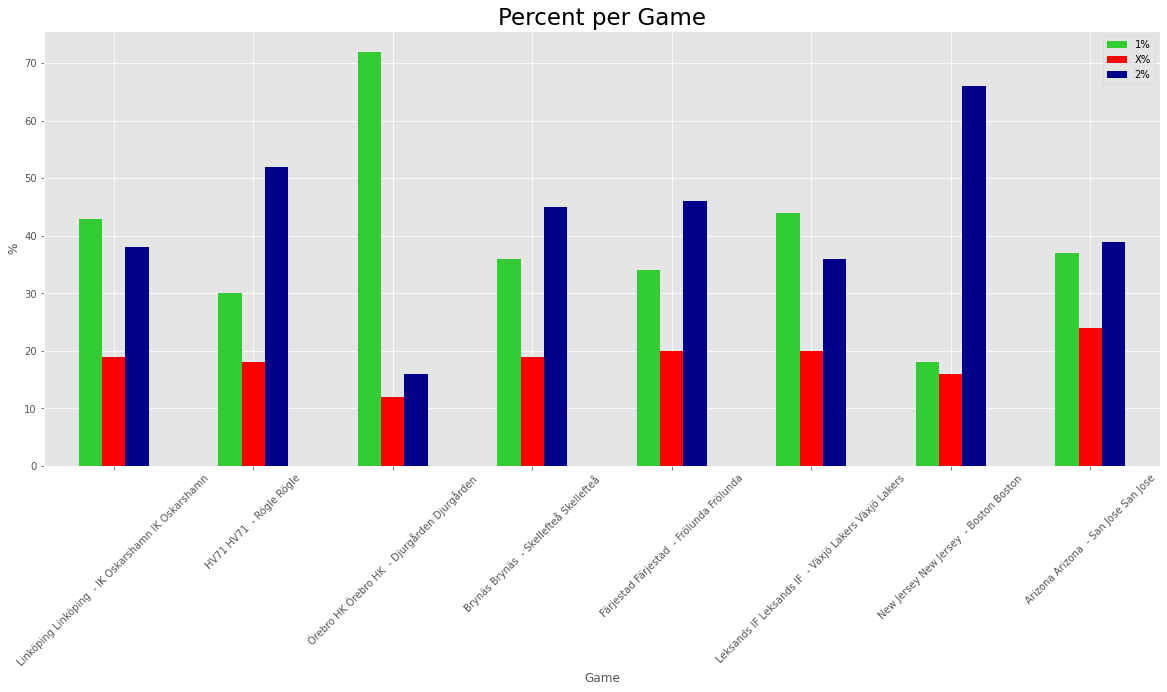

In [16]:
df_pp[['1%', 'X%', '2%']].plot(kind='bar', figsize=(20,8), color=['limegreen', 'red', 'darkblue'], lw=2)
plt.title("Percent per Game", fontsize=23)
plt.xlabel("Game")
plt.ylabel("%")
plt.grid(True)
plt.xticks(rotation=45)

# Data Viz 2
- Plotting the Odds Distribution for each game

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Linköping Linköping  - IK Oskarshamn IK Oskarshamn'),
  Text(1, 0, 'HV71 HV71  - Rögle Rögle'),
  Text(2, 0, 'Örebro HK Örebro HK  - Djurgården Djurgården'),
  Text(3, 0, 'Brynäs Brynäs  - Skellefteå Skellefteå'),
  Text(4, 0, 'Färjestad Färjestad  - Frölunda Frölunda'),
  Text(5, 0, 'Leksands IF Leksands IF  - Växjö Lakers Växjö Lakers'),
  Text(6, 0, 'New Jersey New Jersey  - Boston Boston'),
  Text(7, 0, 'Arizona Arizona  - San Jose San Jose')])

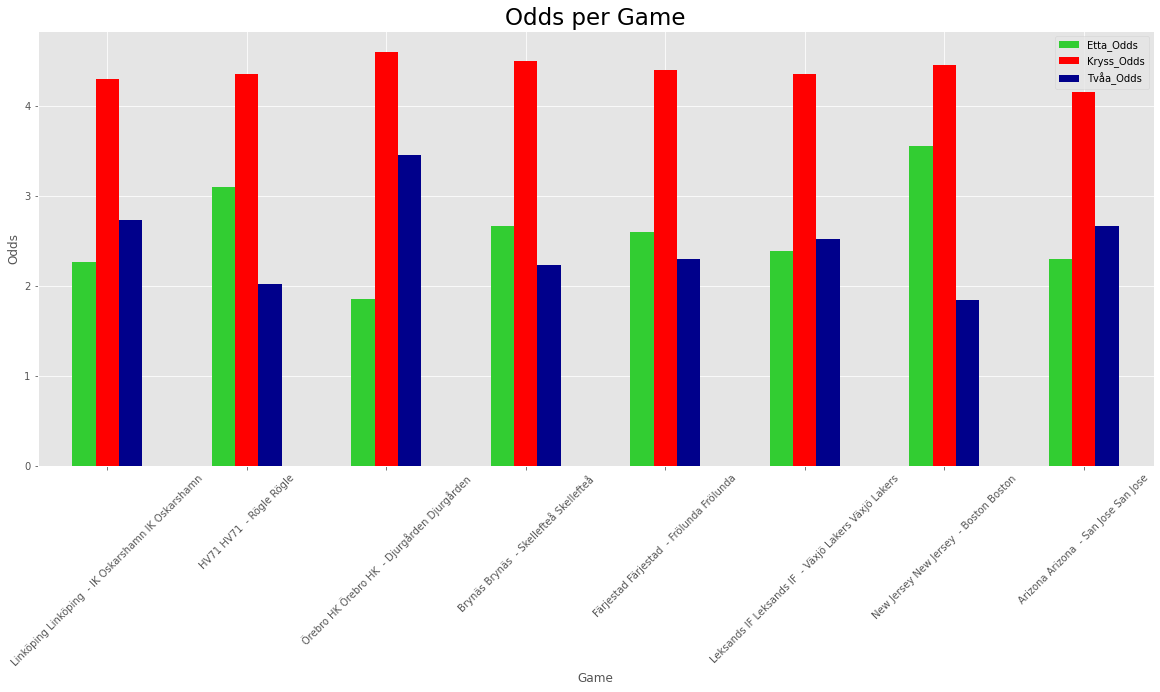

In [17]:
df_pp[['Etta_Odds', 'Kryss_Odds', 'Tvåa_Odds']].plot(kind='bar', figsize=(20,8), color=['limegreen', 'red', 'darkblue'], lw=2)
plt.title("Odds per Game", fontsize=23)
plt.xlabel("Game")
plt.ylabel("Odds")
plt.grid(True)
plt.xticks(rotation=45)

In [150]:
df_pp[['Etta_Real_Odds', 'Kryss_Real_Odds', 'Tvåa_Real_Odds']] = df_pp[['Etta_Odds', 'Kryss_Odds', 'Tvåa_Odds']] * .95 #bookmarkers generally withhold 5 percent of the odds to gain an edge in the market, therefore, we need to 
# re-calculate the odds to adjust for that fact

In [151]:
df_pp

,Nr,1%,X%,2%,Etta_Odds,Kryss_Odds,Tvåa_Odds,Etta_Real_Odds,Kryss_Real_Odds,Tvåa_Real_Odds
Game,,,,,,,,,,
Frölunda Frölunda - Färjestad Färjestad,1,54.0,22.0,24.0,1.92,4.55,3.38,1.8240,4.3225,3.2110
Luleå Luleå - IK Oskarshamn IK Oskarshamn,2,74.0,14.0,12.0,1.45,5.35,5.35,1.3775,5.0825,5.0825
Brynäs Brynäs - Djurgården Djurgården,3,35.0,21.0,44.0,2.67,4.40,2.27,2.5365,4.1800,2.1565
Malmö Redhawks Malmö Redhawks - Leksands IF Leksands IF,4,42.0,23.0,35.0,2.45,4.35,2.45,2.3275,4.1325,2.3275
Rögle Rögle - Linköping Linköping,5,81.0,10.0,9.0,1.51,5.20,5.20,1.4345,4.9400,4.9400
Örebro HK Örebro HK - HV71 HV71,6,58.0,19.0,23.0,1.81,4.60,3.65,1.7195,4.3700,3.4675
Skellefteå Skellefteå - Växjö Lakers Växjö Lakers,7,45.0,23.0,32.0,2.32,4.20,2.67,2.2040,3.9900,2.5365
AIK AIK - BIK Karlskoga BIK Karlskoga,8,38.0,21.0,41.0,2.30,4.41,2.54,2.1850,4.1895,2.4130


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Frölunda Frölunda  - Färjestad Färjestad'),
  Text(1, 0, 'Luleå Luleå  - IK Oskarshamn IK Oskarshamn'),
  Text(2, 0, 'Brynäs Brynäs  - Djurgården Djurgården'),
  Text(3, 0, 'Malmö Redhawks Malmö Redhawks  - Leksands IF Leksands IF'),
  Text(4, 0, 'Rögle Rögle  - Linköping Linköping'),
  Text(5, 0, 'Örebro HK Örebro HK  - HV71 HV71'),
  Text(6, 0, 'Skellefteå Skellefteå  - Växjö Lakers Växjö Lakers'),
  Text(7, 0, 'AIK AIK  - BIK Karlskoga BIK Karlskoga')])

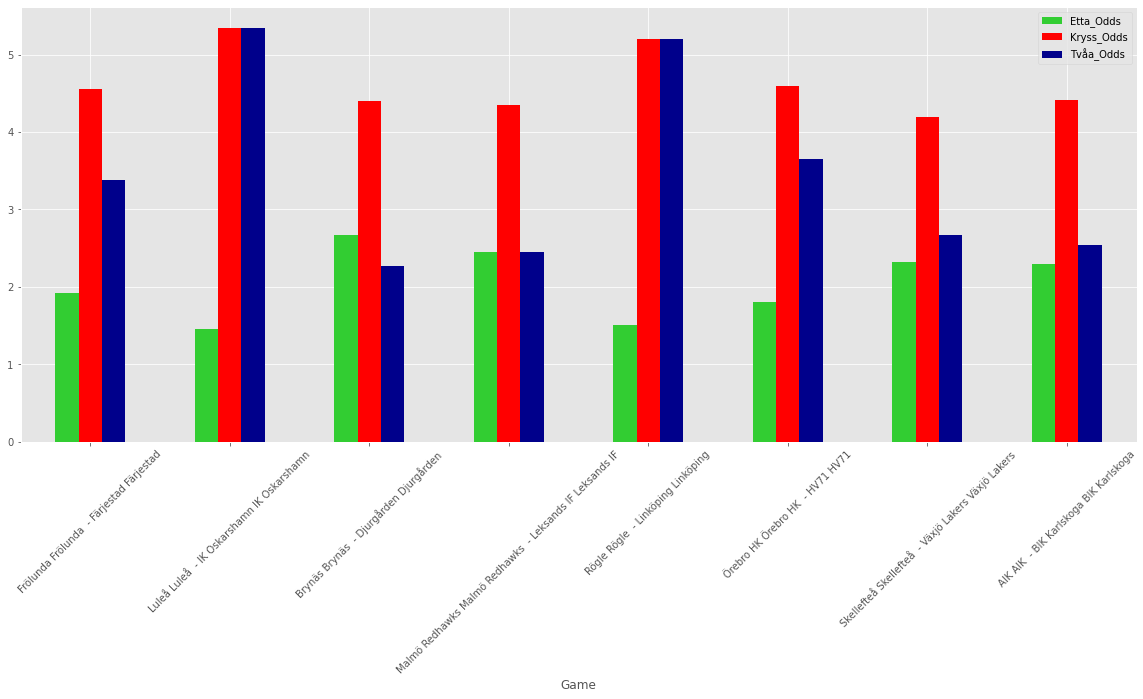

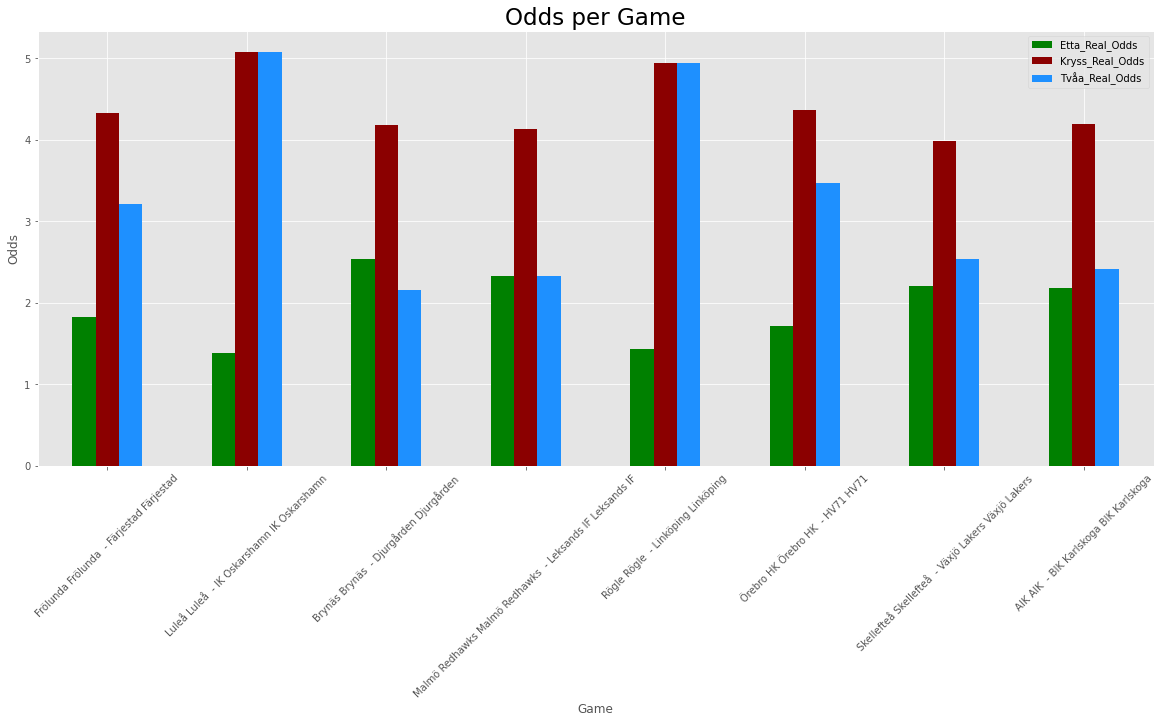

In [155]:
df_pp[['Etta_Odds', 'Kryss_Odds', 'Tvåa_Odds']].plot(kind='bar', figsize=(20,8), color=['limegreen', 'red', 'darkblue'], lw=2)
plt.xticks(rotation=45)
df_pp[['Etta_Real_Odds', 'Kryss_Real_Odds', 'Tvåa_Real_Odds']].plot(kind='bar', figsize=(20,8), color=['green', 'darkred', 'dodgerblue'], lw=2)
plt.title("Odds per Game", fontsize=23)
plt.xlabel("Game")
plt.ylabel("Odds")
plt.grid(True)
plt.xticks(rotation=45)

In [157]:
df_pp[['1_Perc_in_Real_Odds', 'X_Perc_in_Real_Odds', '2_Perc_in_Real_Odds']] = (1/ (df_pp[['Etta_Real_Odds', 'Kryss_Real_Odds', 'Tvåa_Real_Odds']]) * 100).round(1)
df_pp

,Nr,1%,X%,2%,Etta_Odds,Kryss_Odds,Tvåa_Odds,Etta_Real_Odds,Kryss_Real_Odds,Tvåa_Real_Odds,1_Perc_in_Real_Odds,X_Perc_in_Real_Odds,2_Perc_in_Real_Odds
Game,,,,,,,,,,,,,
Frölunda Frölunda - Färjestad Färjestad,1,54.0,22.0,24.0,1.92,4.55,3.38,1.8240,4.3225,3.2110,54.8,23.1,31.1
Luleå Luleå - IK Oskarshamn IK Oskarshamn,2,74.0,14.0,12.0,1.45,5.35,5.35,1.3775,5.0825,5.0825,72.6,19.7,19.7
Brynäs Brynäs - Djurgården Djurgården,3,35.0,21.0,44.0,2.67,4.40,2.27,2.5365,4.1800,2.1565,39.4,23.9,46.4
Malmö Redhawks Malmö Redhawks - Leksands IF Leksands IF,4,42.0,23.0,35.0,2.45,4.35,2.45,2.3275,4.1325,2.3275,43.0,24.2,43.0
Rögle Rögle - Linköping Linköping,5,81.0,10.0,9.0,1.51,5.20,5.20,1.4345,4.9400,4.9400,69.7,20.2,20.2
Örebro HK Örebro HK - HV71 HV71,6,58.0,19.0,23.0,1.81,4.60,3.65,1.7195,4.3700,3.4675,58.2,22.9,28.8
Skellefteå Skellefteå - Växjö Lakers Växjö Lakers,7,45.0,23.0,32.0,2.32,4.20,2.67,2.2040,3.9900,2.5365,45.4,25.1,39.4
AIK AIK - BIK Karlskoga BIK Karlskoga,8,38.0,21.0,41.0,2.30,4.41,2.54,2.1850,4.1895,2.4130,45.8,23.9,41.4


In [158]:
df_pp[['1%', 'X%', '2%']] = df_pp[['1%', 'X%', '2%']].astype(float)

In [159]:
df_pp.dtypes

Nr                       int64
1%                     float64
X%                     float64
2%                     float64
Etta_Odds              float64
Kryss_Odds             float64
Tvåa_Odds              float64
Etta_Real_Odds         float64
Kryss_Real_Odds        float64
Tvåa_Real_Odds         float64
1_Perc_in_Real_Odds    float64
X_Perc_in_Real_Odds    float64
2_Perc_in_Real_Odds    float64
dtype: object

In [19]:
df_pp[['Etta_Real_Odds', 'Kryss_Real_Odds', 'Tvåa_Real_Odds']]

In [162]:
sub_df = df_pp[['1%', 'X%', '2%', '1_Perc_in_Real_Odds', 'X_Perc_in_Real_Odds', '2_Perc_in_Real_Odds']]
sub_df

,1%,X%,2%,1_Perc_in_Real_Odds,X_Perc_in_Real_Odds,2_Perc_in_Real_Odds
Game,,,,,,
Frölunda Frölunda - Färjestad Färjestad,54.0,22.0,24.0,54.8,23.1,31.1
Luleå Luleå - IK Oskarshamn IK Oskarshamn,74.0,14.0,12.0,72.6,19.7,19.7
Brynäs Brynäs - Djurgården Djurgården,35.0,21.0,44.0,39.4,23.9,46.4
Malmö Redhawks Malmö Redhawks - Leksands IF Leksands IF,42.0,23.0,35.0,43.0,24.2,43.0
Rögle Rögle - Linköping Linköping,81.0,10.0,9.0,69.7,20.2,20.2
Örebro HK Örebro HK - HV71 HV71,58.0,19.0,23.0,58.2,22.9,28.8
Skellefteå Skellefteå - Växjö Lakers Växjö Lakers,45.0,23.0,32.0,45.4,25.1,39.4
AIK AIK - BIK Karlskoga BIK Karlskoga,38.0,21.0,41.0,45.8,23.9,41.4


# Data Viz
- Plot to compare where the bettors have overpicked a specific side compared to the correct Odds

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Frölunda Frölunda  - Färjestad Färjestad'),
  Text(1, 0, 'Luleå Luleå  - IK Oskarshamn IK Oskarshamn'),
  Text(2, 0, 'Brynäs Brynäs  - Djurgården Djurgården'),
  Text(3, 0, 'Malmö Redhawks Malmö Redhawks  - Leksands IF Leksands IF'),
  Text(4, 0, 'Rögle Rögle  - Linköping Linköping'),
  Text(5, 0, 'Örebro HK Örebro HK  - HV71 HV71'),
  Text(6, 0, 'Skellefteå Skellefteå  - Växjö Lakers Växjö Lakers'),
  Text(7, 0, 'AIK AIK  - BIK Karlskoga BIK Karlskoga')])

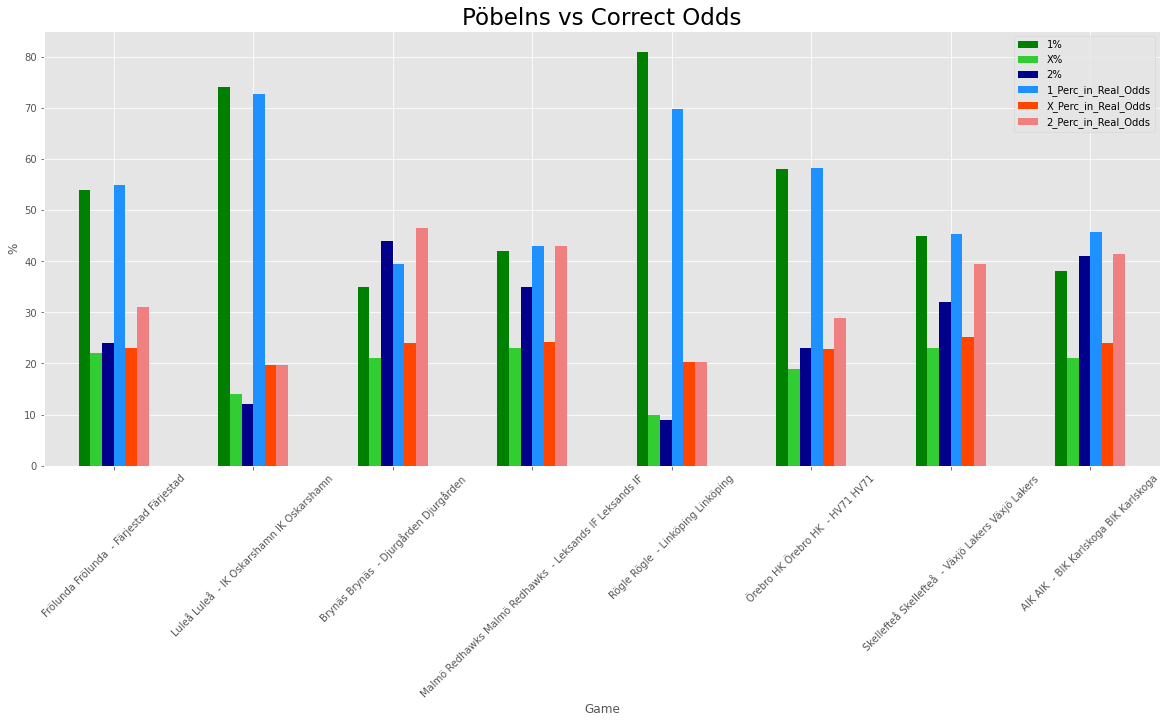

In [163]:
sub_df.plot(kind='bar', figsize=(20,8), color=['green', 'limegreen', 'darkblue', 'dodgerblue', 'orangered', 'lightcoral'], lw=2)
plt.title("Pöbelns vs Correct Odds", fontsize=23)
plt.xlabel("Game")
plt.ylabel("%")
plt.grid(True)
plt.xticks(rotation=45)

In [172]:
# Calculation to validate which side's are the most overpicked/ underpicked 

In [172]:
print(sub_df['1%'] - sub_df['1_Perc_in_Real_Odds'])
print(sub_df['X%'] - sub_df['X_Perc_in_Real_Odds'])
print(sub_df['2%'] - sub_df['2_Perc_in_Real_Odds'])

Game
Frölunda Frölunda  - Färjestad Färjestad                    -0.8
Luleå Luleå  - IK Oskarshamn IK Oskarshamn                   1.4
Brynäs Brynäs  - Djurgården Djurgården                      -4.4
Malmö Redhawks Malmö Redhawks  - Leksands IF Leksands IF    -1.0
Rögle Rögle  - Linköping Linköping                          11.3
Örebro HK Örebro HK  - HV71 HV71                            -0.2
Skellefteå Skellefteå  - Växjö Lakers Växjö Lakers          -0.4
AIK AIK  - BIK Karlskoga BIK Karlskoga                      -7.8
dtype: float64
Game
Frölunda Frölunda  - Färjestad Färjestad                    -1.1
Luleå Luleå  - IK Oskarshamn IK Oskarshamn                  -5.7
Brynäs Brynäs  - Djurgården Djurgården                      -2.9
Malmö Redhawks Malmö Redhawks  - Leksands IF Leksands IF    -1.2
Rögle Rögle  - Linköping Linköping                         -10.2
Örebro HK Örebro HK  - HV71 HV71                            -3.9
Skellefteå Skellefteå  - Växjö Lakers Växjö Lakers          -2.1


In [181]:
sub_df

,1%,X%,2%,1_Perc_in_Real_Odds,X_Perc_in_Real_Odds,2_Perc_in_Real_Odds,Perc_difference_1,Perc_difference_X,Perc_difference_2
Game,,,,,,,,,
Frölunda Frölunda - Färjestad Färjestad,54.0,22.0,24.0,54.8,23.1,31.1,-0.8,-1.1,-7.1
Luleå Luleå - IK Oskarshamn IK Oskarshamn,74.0,14.0,12.0,72.6,19.7,19.7,1.4,-5.7,-7.7
Brynäs Brynäs - Djurgården Djurgården,35.0,21.0,44.0,39.4,23.9,46.4,-4.4,-2.9,-2.4
Malmö Redhawks Malmö Redhawks - Leksands IF Leksands IF,42.0,23.0,35.0,43.0,24.2,43.0,-1.0,-1.2,-8.0
Rögle Rögle - Linköping Linköping,81.0,10.0,9.0,69.7,20.2,20.2,11.3,-10.2,-11.2
Örebro HK Örebro HK - HV71 HV71,58.0,19.0,23.0,58.2,22.9,28.8,-0.2,-3.9,-5.8
Skellefteå Skellefteå - Växjö Lakers Växjö Lakers,45.0,23.0,32.0,45.4,25.1,39.4,-0.4,-2.1,-7.4
AIK AIK - BIK Karlskoga BIK Karlskoga,38.0,21.0,41.0,45.8,23.9,41.4,-7.8,-2.9,-0.4


# Significantly overpicked teams
- Rogle by 11.3% ==> very overpicked according to the correct Odds... meaning pick the other side for edge in the system

# Significantly underpicked teams 
- HV -11.2%
- Lkpg - 10.2%
- Vaxjo - 7.4%
- Leksand -8%
- AIK -7.8%
==> Betting on these teams should be beneficiary according to the odds versus the public perception